In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## read and describe the metadata

In [2]:
fpn_csv = '/Volumes/Samsung_t3/machinelearning/personal_ml/ML_assignment_3/cluster_images.csv'
data = pd.read_csv(fpn_csv, encoding='ISO-8859-1')

In [3]:
# get column names
list(data)

['s_no',
 'artist',
 'title',
 'art_movement',
 'museum_venue',
 'country_of_origin',
 'has_text',
 'primary_medium',
 'medium',
 'work_size',
 'date',
 'representation',
 'representation_semi',
 'kinetic',
 'map',
 'map2',
 'spatial_dimension',
 'spatial_dimension2',
 'pl',
 'si',
 'va',
 'te',
 'co',
 'or',
 'sh',
 'reflection',
 'po',
 'li',
 'ar',
 'notes']

In [4]:
data.head()

,s_no,artist,title,art_movement,museum_venue,country_of_origin,has_text,primary_medium,medium,work_size,...,va,te,co,or,sh,reflection,po,li,ar,notes
0,2,Giorgio de Chirico,The Uncertainty of the Poet,surrealism,Tate,Italy,False,painting,"painting, oil on canvas",106 x 94 cm,...,3,0,0,4,3,False,0,0,5,"distorted perspective, shadow, signification o..."
1,3,Giovanni Anselmo,Direction,arte povera,Tate,Italy,False,sculpture,"sculpture, fabric, glass & metal",24 x 420 x 335 cm,...,1,3,0,3,2,False,0,0,5,"hard to understand the viewpoint, sense of for..."
2,4,Milton Avery,Yellow Sky,modernism,Tate,America,False,painting,"painting, oil on canvas",156 x 184 cm,...,2,4,4,2,4,False,0,0,5,"flatish, textured shapes & specific colors-lin..."
3,5,Gillian Avery,Distillation,abstraction,Tate,UK,False,painting,"painting, oil, household paint on hardboard",213 x 152 cm,...,1,2,0,2,4,False,0,0,5,"shapes, layers, paint handlng/texture, orienta..."
4,6,Joseph (Jef) Banc,Pair-Bearing Matrix,abstraction,Tate,France,False,painting,"painting, mixed media on canvas",73 x 60 cm,...,1,4,1,0,4,False,0,0,5,"ambiguity through abstraction, odd shape, v te..."


## create a subset of the columns you will use to fit KMeans

Here, I am **arbitrarily** choosing the seven [visual variables defined by Bertin](http://www.infovis-wiki.net/index.php?title=Visual_Variables#Jaques_Bertin). Variable descriptions [here](https://github.com/visualizedata/ml/blob/master/ML_assignment_3/contents-of-cluster_images.csv). 

You should choose the columns that you decide will best define the clusters. You may need to make transformations on existing variables. 

In [5]:
data.shape

(404, 30)

In [6]:
data.art_movement.unique()

array(['surrealism', 'arte povera', 'modernism', 'abstraction',
       'conceptual', 'representation', 'postminimal', 'postmod', 'pop art',
       'cubism', 'Unknown', 'collage', 'COBRA', 'constructivism',
       'minimalism', 'suprematism', 'kinetic art', 'dada',
       'pre-raphaelite', 'Neo-Concrete Movement', 'abstract expressionism',
       'op art', 'gutai', 'land art', 'assemblage', 'ZERO', 'fluxus',
       'futurism', 'supports/surfaces'], dtype=object)

In [7]:
# Run for surrealism
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer

hv = CountVectorizer(analyzer="word", ngram_range=(1,2))
X_hv = hv.fit_transform(data.notes)
print(X_hv.shape)

(404, 8860)


In [8]:
from sklearn.externals import joblib
joblib.dump(hv, 'hv.pkl')

['hv.pkl']

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
X_tfidf = transformer.fit_transform(X_hv)

joblib.dump(transformer, 'transformer.pkl') # pickle

['transformer.pkl']

In [10]:
print(type(X_tfidf))

<class 'scipy.sparse.csr.csr_matrix'>


In [11]:
# surrealism['representation'] = np.where(surrealism['representation']==True, 1, 0)
X_quant_features = data[['co','or', 'sh']]

In [12]:
X_quant_features.head()

,co,or,sh
0,0,4,3
1,0,3,2
2,4,2,4
3,0,2,4
4,1,0,4


In [13]:
from scipy.sparse import csr_matrix, hstack
X_quant_features_csr = csr_matrix(X_quant_features)
X_combined = hstack([X_tfidf, X_quant_features_csr])
X_matrix = csr_matrix(X_combined) # convert to sparse matrix
print(X_matrix.shape)

(404, 8863)


In [14]:
# feature scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler(with_mean=False)
# X = sc.fit_transform(X_matrix)
# print(X.shape)

# joblib.dump(sc, 'sc.pkl') # pickle

X = X_matrix

# KMeans

In [15]:
from sklearn.cluster import KMeans

## plot inertia scores by number of clusters

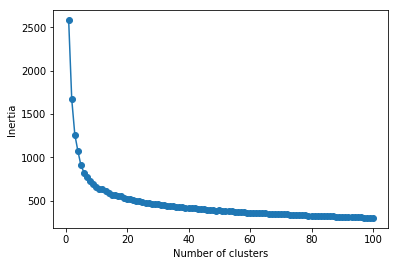

In [16]:
# first attempt at fitting K means to view change in Inertia

# container to store inertia scores over iterations
distortions = []

# fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(1, 101):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)
    
# vizualize change in inertia
plt.plot(range(1, 101), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## create silhouette plots to assess various specifications for `n_clusters` in `KMeans`

In [17]:
# modify this list to include the numbers of clusters you want to see
# I have *arbitrarily* chosen these values
range_n_clusters = [5,6,7,8,9,10]

For n_clusters = 5 The average silhouette_score is : 0.302852962606


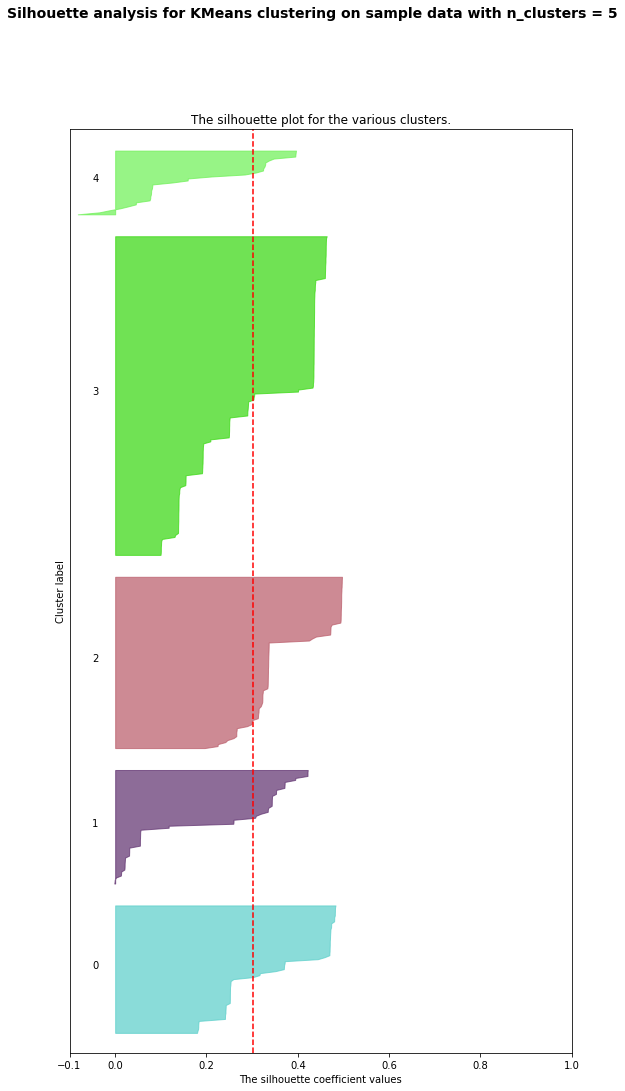

For n_clusters = 6 The average silhouette_score is : 0.248275118953


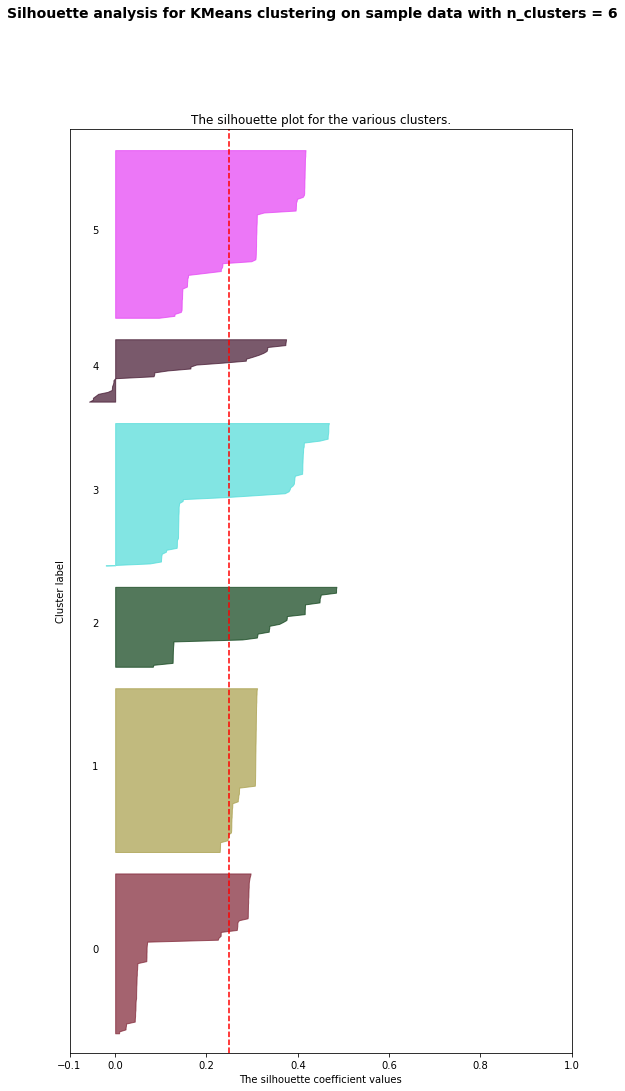

For n_clusters = 7 The average silhouette_score is : 0.215584056901


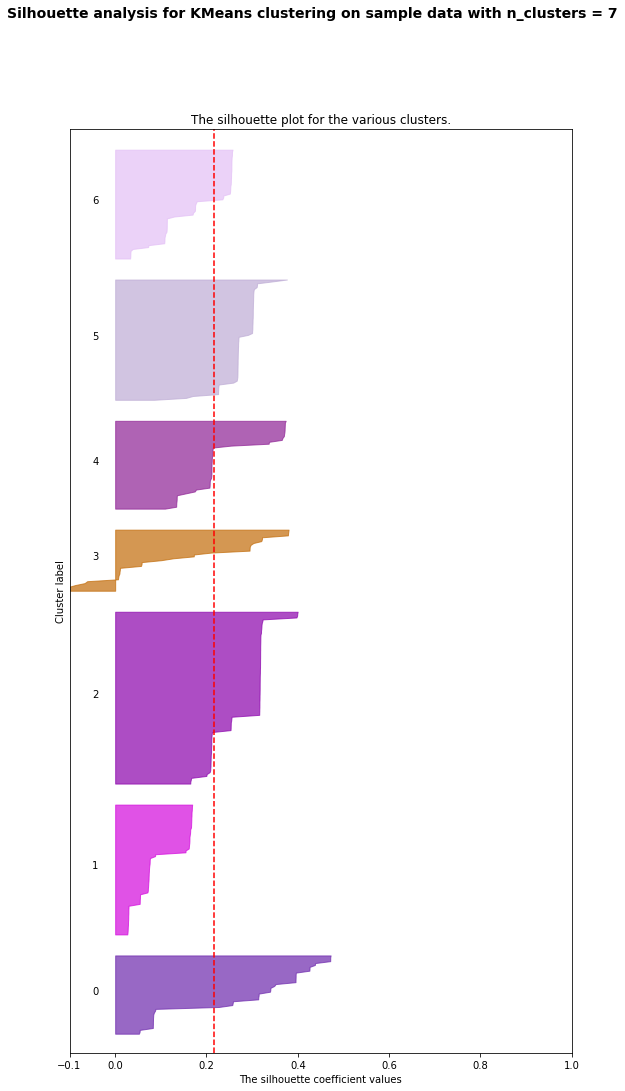

For n_clusters = 8 The average silhouette_score is : 0.182002574371


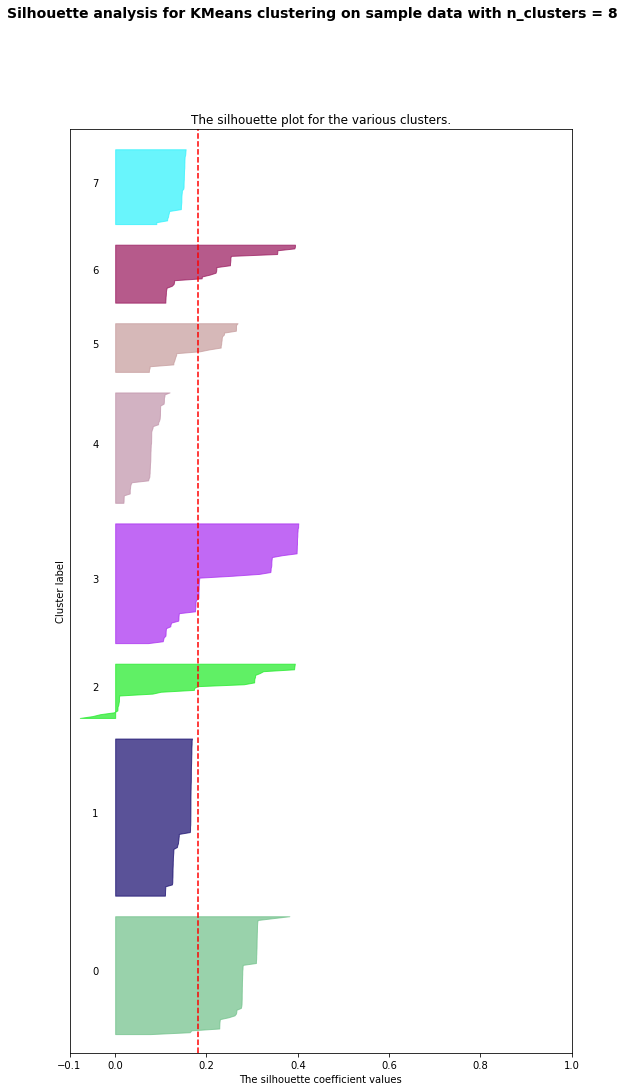

For n_clusters = 9 The average silhouette_score is : 0.221879336618


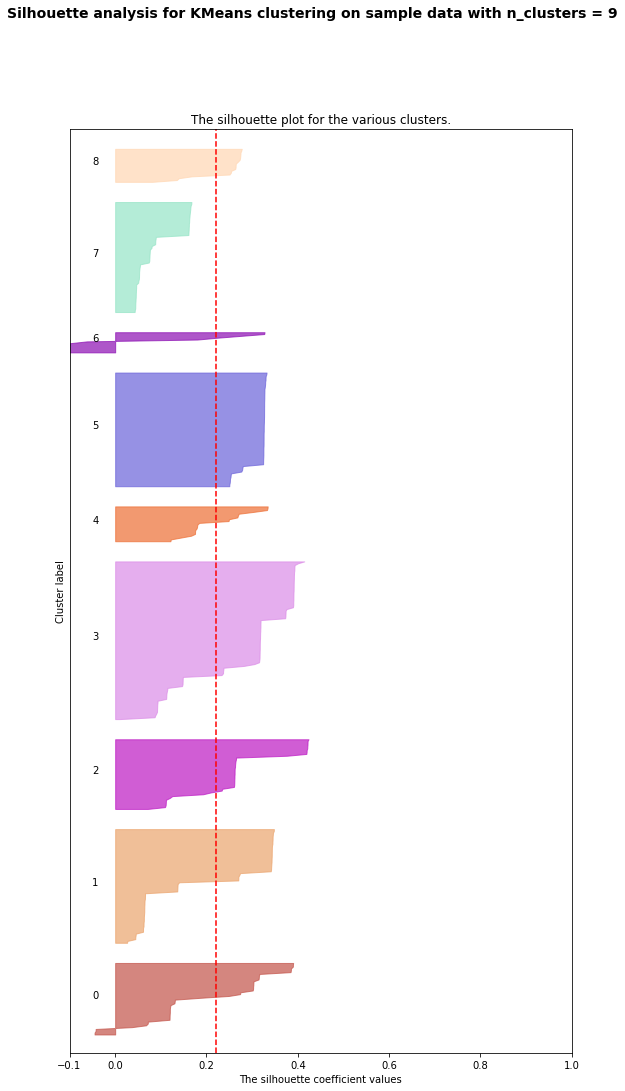

For n_clusters = 10 The average silhouette_score is : 0.197985798243


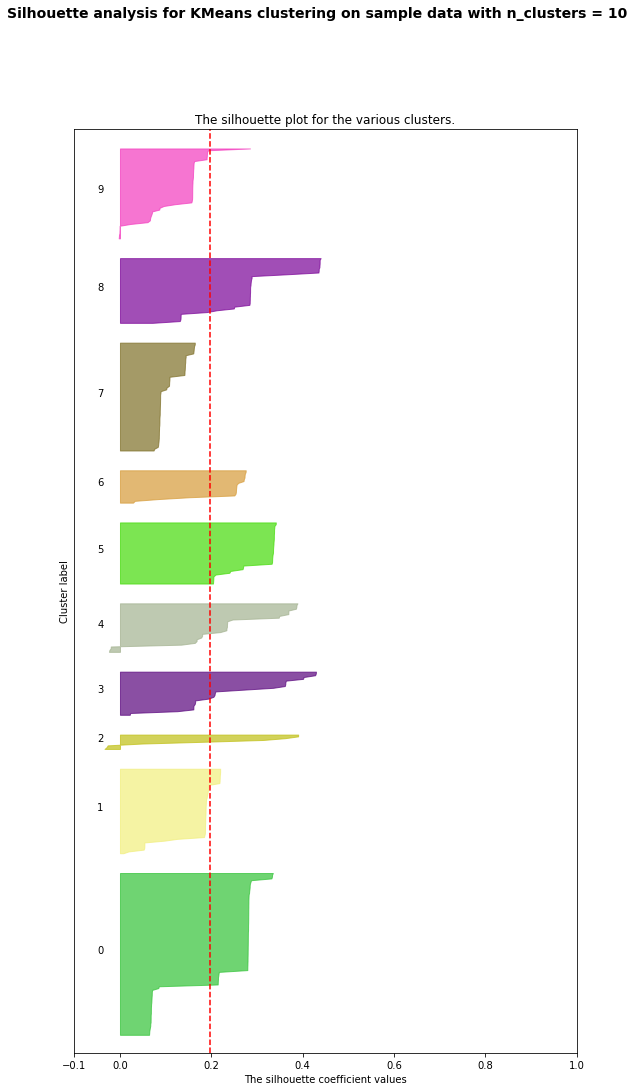

In [18]:
# modified from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 17)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## final fit

After you have decided which features to include and the number of clusters you want, fit your final KMeans model. I have **arbitrarily** chosen 5. 

In [19]:
# set the number of clusters in the final model
my_n_clusters = 8

In [20]:
km = KMeans(n_clusters=my_n_clusters)
km.fit(X)
results = km.fit_predict(X)
print(results)

[4 2 6 0 5 1 7 1 4 1 4 1 3 1 6 5 7 5 5 5 0 5 0 6 5 5 2 5 5 7 5 4 5 2 5 5 0
 0 0 1 3 4 2 0 2 2 5 2 5 0 4 4 4 4 4 0 2 4 5 4 7 4 3 3 1 5 7 1 0 1 1 7 2 1
 7 4 7 3 4 7 5 3 5 2 3 0 1 7 7 7 2 1 2 3 4 7 6 4 2 6 6 1 1 5 2 3 2 5 4 0 2
 4 5 6 5 0 3 5 0 5 3 5 4 3 4 0 4 7 5 5 5 7 3 7 4 4 5 2 4 3 3 5 3 4 2 4 5 0
 2 0 3 5 0 0 3 4 7 4 5 1 0 4 5 7 1 1 4 6 4 4 3 0 6 5 5 4 4 7 0 0 0 5 6 0 5
 5 3 3 4 6 1 0 3 5 4 3 6 5 5 0 4 5 6 4 6 5 3 5 3 5 5 6 4 3 0 5 2 1 6 4 3 5
 3 1 3 4 4 4 4 5 3 4 6 3 4 0 5 5 6 1 7 6 1 5 3 2 5 1 5 3 5 3 5 3 5 3 3 5 5
 4 1 2 3 3 5 2 0 3 3 5 5 5 0 5 5 0 5 3 1 4 3 5 6 3 5 2 0 4 4 5 4 4 6 4 4 4
 7 7 5 6 0 6 4 2 4 1 1 1 4 3 1 4 1 3 7 1 2 6 2 4 4 1 2 3 5 5 3 5 5 5 7 0 3
 2 0 5 0 3 3 6 3 6 5 0 0 0 1 5 0 5 4 4 0 0 0 4 7 1 6 3 3 7 6 5 3 3 5 6 4 4
 5 0 5 2 3 4 4 1 4 6 4 3 5 1 4 5 6 5 3 4 7 4 4 0 3 3 4 5 1 5 1 7 1 3]


## look at results

The key to knowing if you have chosen the right features and clusters: looking at the images in each cluster and deciding whether they seem to belong together. You could extend this starter code to display the images in this notebook, or you may decide to use Python to write an html file/files to view the images by cluster.

In [21]:
data['labels'] = results
data['s_no'] = data['s_no'].apply(str)
data['size'] = 40000
data['path'] = "https://raw.githubusercontent.com/3milychu/personal_ml/master/ML_assignment_3/img_small/" + data['s_no']+ "_small.jpg"
data.head()

,s_no,artist,title,art_movement,museum_venue,country_of_origin,has_text,primary_medium,medium,work_size,...,or,sh,reflection,po,li,ar,notes,labels,size,path
0,2,Giorgio de Chirico,The Uncertainty of the Poet,surrealism,Tate,Italy,False,painting,"painting, oil on canvas",106 x 94 cm,...,4,3,False,0,0,5,"distorted perspective, shadow, signification o...",4,40000,https://raw.githubusercontent.com/3milychu/per...
1,3,Giovanni Anselmo,Direction,arte povera,Tate,Italy,False,sculpture,"sculpture, fabric, glass & metal",24 x 420 x 335 cm,...,3,2,False,0,0,5,"hard to understand the viewpoint, sense of for...",2,40000,https://raw.githubusercontent.com/3milychu/per...
2,4,Milton Avery,Yellow Sky,modernism,Tate,America,False,painting,"painting, oil on canvas",156 x 184 cm,...,2,4,False,0,0,5,"flatish, textured shapes & specific colors-lin...",6,40000,https://raw.githubusercontent.com/3milychu/per...
3,5,Gillian Avery,Distillation,abstraction,Tate,UK,False,painting,"painting, oil, household paint on hardboard",213 x 152 cm,...,2,4,False,0,0,5,"shapes, layers, paint handlng/texture, orienta...",0,40000,https://raw.githubusercontent.com/3milychu/per...
4,6,Joseph (Jef) Banc,Pair-Bearing Matrix,abstraction,Tate,France,False,painting,"painting, mixed media on canvas",73 x 60 cm,...,0,4,False,0,0,5,"ambiguity through abstraction, odd shape, v te...",5,40000,https://raw.githubusercontent.com/3milychu/per...


In [22]:
list(data)

['s_no',
 'artist',
 'title',
 'art_movement',
 'museum_venue',
 'country_of_origin',
 'has_text',
 'primary_medium',
 'medium',
 'work_size',
 'date',
 'representation',
 'representation_semi',
 'kinetic',
 'map',
 'map2',
 'spatial_dimension',
 'spatial_dimension2',
 'pl',
 'si',
 'va',
 'te',
 'co',
 'or',
 'sh',
 'reflection',
 'po',
 'li',
 'ar',
 'notes',
 'labels',
 'size',
 'path']

In [23]:
# write to a csv
data.to_csv("/Volumes/Samsung_t3/machinelearning/personal_ml/ML_assignment_3/submission_03/results3.csv", index=False)
        

In [24]:
import csv
import json

# create json
csvfile = open("/Volumes/Samsung_t3/machinelearning/personal_ml/ML_assignment_3/submission_03/results3.csv", 'r')
jsonfile = open('/Volumes/Samsung_t3/machinelearning/personal_ml/ML_assignment_3/submission_03/results3.json', 'w')

fieldnames = ('s_no','artist','title','art_movement','museum_venue','country_of_origin','has_text','primary_medium',
 'medium','work_size','date','representation','representation_semi','kinetic','map','map2','spatial_dimension',
 'spatial_dimension2','pl','si','va','te','co','or','sh','reflection','po','li','ar','notes','labels','size', 'path')
reader = csv.DictReader( csvfile, fieldnames)
out = json.dumps( [ row for row in reader ] )
jsonfile.write(out)

380708

In [25]:
for i in range(0, max(km.labels_)+1):
    print(" ")
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    print("Images in cluster: " + str(i))
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    for j in range(0, len(km.labels_)):
        if km.labels_[j] == i:
            print(str(j+2) + '_small.jpg')

 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 0
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
5_small.jpg
22_small.jpg
24_small.jpg
38_small.jpg
39_small.jpg
40_small.jpg
45_small.jpg
51_small.jpg
57_small.jpg
70_small.jpg
87_small.jpg
111_small.jpg
117_small.jpg
120_small.jpg
127_small.jpg
149_small.jpg
151_small.jpg
154_small.jpg
155_small.jpg
162_small.jpg
173_small.jpg
180_small.jpg
181_small.jpg
182_small.jpg
185_small.jpg
193_small.jpg
201_small.jpg
216_small.jpg
237_small.jpg
268_small.jpg
274_small.jpg
277_small.jpg
288_small.jpg
302_small.jpg
333_small.jpg
336_small.jpg
338_small.jpg
345_small.jpg
346_small.jpg
347_small.jpg
350_small.jpg
354_small.jpg
355_small.jpg
356_small.jpg
373_small.jpg
395_small.jpg
 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 1
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
7_small.jpg
9_small.jpg
11_small.jpg
13_small.jpg
15_small.jpg
41_small.jpg
66